In [ ]:
!pip install nltk scikit-learn numpy pandas -q

In [52]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [54]:
df=pd.read_csv('/content/movies.csv')
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [55]:
df.shape

(4803, 24)

In [56]:
required_columns=['genres','keywords','overview','title']
df=df[required_columns]
df.head()

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Following the death of District Attorney Harve...,The Dark Knight Rises
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,"John Carter is a war-weary, former military ca...",John Carter


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [58]:
df=df.dropna().reset_index(drop=True)

In [59]:
df['combined']=df['genres']+' '+df['keywords']+' '+df['overview']

In [60]:
data=df[['title','combined']]
data.head()

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...


In [61]:
data.shape



(4387, 2)

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

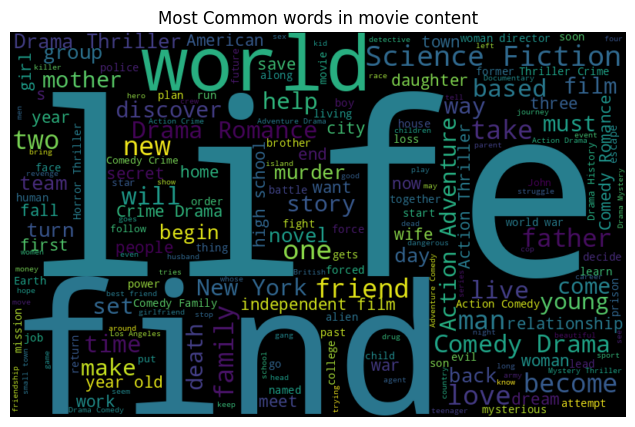

In [62]:
combined_text=" ".join(df['combined'])
wordcloud=WordCloud(width=800,height=500,background_color='black').generate(combined_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Most Common words in movie content')
plt.axis('off')

In [63]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
stop_words=set(stopwords.words('english'))

In [65]:
def preprocess_text(text):
  text=re.sub(r'[^a-zA-Z\s]','',text)
  text=text.lower()
  tokens=word_tokenize(text.lower())
  tokens=[word for word in tokens if word not in stop_words]
  return ' '.join(tokens);

In [66]:
data['cleaned_text']=df['combined'].apply(preprocess_text)
data.head()

<ipython-input-66-b18ed901d814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text']=df['combined'].apply(preprocess_text)


,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based novel secret ...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,action crime drama thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...,action adventure science fiction based novel m...


In [67]:
tfidf_vectorizer=TfidfVectorizer(max_features=5000)

In [68]:
tfidfmatrix=tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [69]:
cosine_sim=cosine_similarity(tfidfmatrix,tfidfmatrix)

In [70]:



def recommend_movies(movie_name,cosine_sim=cosine_sim,df=data,top=5):


  idx = df[df['title'].str.lower() == movie_name.lower()].index
  if len(idx) == 0 :
    return "Movie not found in the dataset :( "
  idx= idx[0]

  # Get the similarity scores for the given movie
  sim_scores=list(enumerate(cosine_sim[idx]))
  # Sort the movies based on similarity scores in descending order
  sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
  # Get the scores of the top 'top' movies (excluding the movie itself)
  sim_scores=sim_scores[1:top+1]
  # Get the indices of the recommended movies
  movie_indices=[i[0] for i in sim_scores]

  # Return the titles of the recommended movies
  result_df= df[['title']].iloc[movie_indices].reset_index(drop=True)
  result_df.index=result_df.index  +1
  result_df.index.name='S.No'
  return result_df

In [71]:
row_index=df[df['title']=='Triangle'].index
print(row_index)

Index([2777], dtype='int64')


In [72]:
movie_name=data['title'][2777]
print(movie_name)

Triangle


In [73]:
print(f"Recommendations for the Movie {movie_name}")
recommendation=recommend_movies(movie_name)
print(recommendation)

Recommendations for the Movie Triangle
                                  title
S.No                                   
1                           Deep Rising
2                           All Is Lost
3                     The Perfect Storm
4                                Sphere
5     Extremely Loud & Incredibly Close


In [74]:
import pickle

In [75]:
pickle.dump(data,open('movies.pkl','wb'))

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
data.iloc[1216].title

"Get Rich or Die Tryin'"

In [78]:
data['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'El Mariachi', 'Signed, Sealed, Delivered',
       'My Date with Drew'], dtype=object)

In [83]:
data.to_dict()

{'title': {0: 'Avatar',
  1: "Pirates of the Caribbean: At World's End",
  2: 'Spectre',
  3: 'The Dark Knight Rises',
  4: 'John Carter',
  5: 'Spider-Man 3',
  6: 'Tangled',
  7: 'Avengers: Age of Ultron',
  8: 'Harry Potter and the Half-Blood Prince',
  9: 'Batman v Superman: Dawn of Justice',
  10: 'Superman Returns',
  11: 'Quantum of Solace',
  12: "Pirates of the Caribbean: Dead Man's Chest",
  13: 'The Lone Ranger',
  14: 'Man of Steel',
  15: 'The Chronicles of Narnia: Prince Caspian',
  16: 'The Avengers',
  17: 'Pirates of the Caribbean: On Stranger Tides',
  18: 'Men in Black 3',
  19: 'The Hobbit: The Battle of the Five Armies',
  20: 'The Amazing Spider-Man',
  21: 'Robin Hood',
  22: 'The Hobbit: The Desolation of Smaug',
  23: 'The Golden Compass',
  24: 'King Kong',
  25: 'Titanic',
  26: 'Captain America: Civil War',
  27: 'Battleship',
  28: 'Jurassic World',
  29: 'Skyfall',
  30: 'Spider-Man 2',
  31: 'Iron Man 3',
  32: 'Alice in Wonderland',
  33: 'X-Men: The Las

In [82]:
pickle.dump(data.to_dict(),open('movie_dict.pkl','wb'))

In [ ]:
pickle.dump(cosine_sim,open('similarity.pkl','wb'))